# Fitbit Downloader

### About Fitbit Data Downloader: 

File file provides a way to download your fitbit data to CSV, including heart rate, sleep, sleeps and weight. Some simple visualizations are used to check numbers. See fitbit data analysis file for more in-depth data visualizations.

### Setup and Installation Steps

Getting the Credentials setup for FitBit integration is a bit annoying, but if you fall these steps, it should work. 

* Create a developer application at https://dev.fitbit.com/ 
* Set your callback URL as http://127.0.0.1:8080/
* From your Fitbit application, copy your "OAuth 2.0 Client ID" and "Client Secret" 
* Install Python Fitbit: `$ pip install fitbit`
* Clone or Download https://github.com/orcasgit/python-fitbit
* Navigate to python-fitbit directory and install the dependencies with `$ sudo pip install -r requirements/base.txt`
* Inside python-fitbit directory run this command `$ python gather_keys_oauth2.py <client-id> <client-secret>`
* This should redirect you to fitbit website where you you will signin and authorize your user. 
* After you will be redirected to your localhost url. Inside the terminal, you will receive a message that includes your token info. Copy all the info. 
* Copy credentials-sample.json to credentials.json
* Inside credentials-sample.json add your info. 


## Acknowledgements and Helpful Resources

* [Collect Your Own Fitbit Data with Python](https://towardsdatascience.com/collect-your-own-fitbit-data-with-python-ff145fa10873) and [Code](https://github.com/stephenjhsu/fitbit) by Stephen Hsu

### Libraries and Dependencies

In [1]:
import fitbit
# import gather_keys_oauth2 as Oauth2

In [2]:
import numpy as np
import pandas as pd 
import datetime
import dateutil.parser
import seaborn
import time
%matplotlib inline

### Credentials and Authentification

In [3]:
import json

with open("credentials.json", "r") as file:
    credentials = json.load(file)
    fitbit_cr = credentials['fitbit']
    CLIENT_SECRET = fitbit_cr['CLIENT_SECRET']
    CLIENT_ID = fitbit_cr['CLIENT_ID']
    USER_ID = fitbit_cr['USER_ID']
    ACCESS_TOKEN = fitbit_cr['ACCESS_TOKEN']
    REFRESH_TOKEN = fitbit_cr['REFRESH_TOKEN']

In [4]:
#Authorization info
auth2_client = fitbit.Fitbit(USER_ID, CLIENT_SECRET, oauth2=True, access_token=ACCESS_TOKEN, refresh_token=REFRESH_TOKEN)

### Current Day Today and Yesterday

In [5]:
# Get Today and Yesterday Dates in FitBit Ready Formats
yesterday = str((datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y%m%d"))
yesterday = str((datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y-%m-%d"))
today = str(datetime.datetime.now().strftime("%Y-%m-%d"))
today

'2019-08-14'

### Customizable Date Range 

In [6]:
# list of dates to check
dates_list = []
date1 = '2019-07-01' # Got Fitbit Device 2018-04-17 or since last data update
date2 = today
start = datetime.datetime.strptime(date1, '%Y-%m-%d')
end = datetime.datetime.strptime(date2, '%Y-%m-%d')
step = datetime.timedelta(days=1)

while start <= end:
    dates_list.append(start.date().strftime("%Y-%m-%d"))
    start += step

# Download Daily Steps Data

In [7]:
# Get Steps Data in JSON from Last Year
steps_ts = auth2_client.time_series('activities/steps', period='1y')

# base-date: The range start date, in the format yyyy-MM-dd or today.
# end-date: The end date of the range.
# date: The end date of the period specified in the format yyyy-MM-dd or today.
# period: The range for which data will be returned. Options are 1d, 7d, 30d, 1w, 1m, 3m, 6m, 1y

In [8]:
steps_ts['activities-steps'][-2]

{'dateTime': '2019-08-12', 'value': '7701'}

In [9]:
date_steps_list = [(dateutil.parser.parse(date_steps_dict['dateTime']), int(date_steps_dict['value']))
              for date_steps_dict in steps_ts['activities-steps']]
date_steps_list[-2]

(datetime.datetime(2019, 8, 12, 0, 0), 7701)

In [10]:
len(date_steps_list) # 365 days

365

In [11]:
# convert to data frame
date_steps = pd.DataFrame(date_steps_list, columns=('Date', 'Steps'))

In [12]:
date_steps.tail()

,Date,Steps
360,2019-08-09,3706
361,2019-08-10,5962
362,2019-08-11,3091
363,2019-08-12,7701
364,2019-08-13,3260


In [13]:
# days with steps
len(date_steps[date_steps.Steps > 0])

365

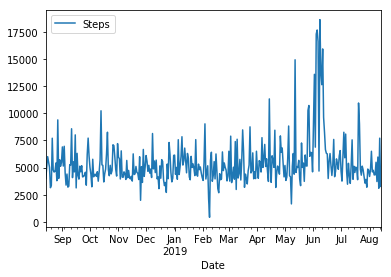

In [14]:
# Days with Steps Visualization
date_steps.plot(x='Date', y='Steps')

In [15]:
# save to csv
date_steps.to_csv('data/daily_steps.csv', index=None, encoding='utf-8')

# Download Additional Activity Data

### All Options

SEE: https://dev.fitbit.com/build/reference/web-api/activity/#activity-time-series

- activities/calories
- activities/caloriesBMR
- activities/steps
- activities/distance
- activities/floors
- activities/elevation
- activities/minutesSedentary
- activities/minutesLightlyActive
- activities/minutesFairlyActive
- activities/minutesVeryActive
- activities/activityCalories

In [16]:
# example: minutesSedentary 
activity_ts = auth2_client.time_series('activities/minutesSedentary', period='1y')
date_act_list = [(dateutil.parser.parse(date_act_dict['dateTime']), int(date_act_dict['value']))
              for date_act_dict in activity_ts[list(activity_ts.keys())[0]]]
minutesSedentary = pd.DataFrame(date_act_list, columns=('Date', 'minutesSedentary'))
minutesSedentary.to_csv('data/minutesSedentary.csv', index=None, encoding='utf-8')

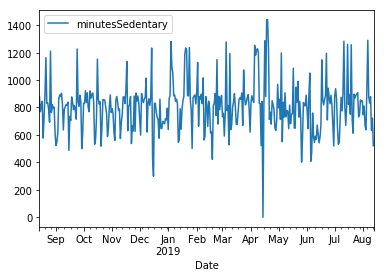

In [17]:
minutesSedentary.plot(x='Date', y='minutesSedentary')

In [18]:
# example: minutesLightlyActive 
activity_ts = auth2_client.time_series('activities/minutesLightlyActive', period='1y')
date_act_list = [(dateutil.parser.parse(date_act_dict['dateTime']), int(date_act_dict['value']))
              for date_act_dict in activity_ts[list(activity_ts.keys())[0]]]
minutesLightlyActive = pd.DataFrame(date_act_list, columns=('Date', 'minutesLightlyActive'))
minutesLightlyActive.to_csv('data/minutesLightlyActive.csv', index=None, encoding='utf-8')

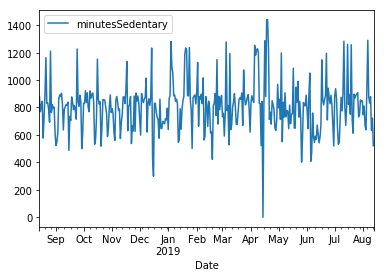

In [19]:
minutesSedentary.plot(x='Date', y='minutesSedentary')

In [20]:
# activities/minutesFairlyActive
activity_ts = auth2_client.time_series('activities/minutesFairlyActive', period='1y')
date_act_list = [(dateutil.parser.parse(date_act_dict['dateTime']), int(date_act_dict['value']))
              for date_act_dict in activity_ts[list(activity_ts.keys())[0]]]
minutesFairlyActive = pd.DataFrame(date_act_list, columns=('Date', 'minutesFairlyActive'))
minutesFairlyActive.to_csv('data/minutesFairlyActive.csv', index=None, encoding='utf-8')

In [21]:
# activities/minutesVeryActive
activity_ts = auth2_client.time_series('activities/minutesVeryActive', period='1y')
date_act_list = [(dateutil.parser.parse(date_act_dict['dateTime']), int(date_act_dict['value']))
              for date_act_dict in activity_ts[list(activity_ts.keys())[0]]]
minutesVeryActive = pd.DataFrame(date_act_list, columns=('Date', 'minutesVeryActive'))
minutesVeryActive.to_csv('data/minutesVeryActive.csv', index=None, encoding='utf-8')

------

# Weight 

In [22]:
# TODO: https://dev.fitbit.com/build/reference/web-api/body/

In [23]:
# Get Current Body Measurements
# body = auth2_client.body()
# body

In [24]:
# Get Weight Data in JSON from Last Year
weight_raw = auth2_client.time_series('body/weight', period='1y')

# base-date: The range start date, in the format yyyy-MM-dd or today.
# end-date: The end date of the range.
# date: The end date of the period specified in the format yyyy-MM-dd or today.
# period: The range for which data will be returned. Options are 1d, 7d, 30d, 1w, 1m, 3m, 6m, 1y

# weight['body-weight']

# convert to list of dict
weight_list = [(dateutil.parser.parse(date_weight_dict['dateTime']), float(date_weight_dict['value']))
              for date_weight_dict in weight_raw['body-weight']]
weight_list[-2]

# convert to data frame
weight = pd.DataFrame(weight_list, columns=('Date', 'Weight'))

#save to csv
weight.to_csv("data/daily-weight.csv")

In [25]:
# Get BMI Data in JSON from Last Year
bmi_raw = auth2_client.time_series('body/bmi', period='1y')

# bmi_raw['body-bmi']

# convert to list of dict
bmi_list = [(dateutil.parser.parse(date_bmi_dict['dateTime']), float(date_bmi_dict['value']))
              for date_bmi_dict in bmi_raw['body-bmi']]
bmi_list[-2]

# convert to data frame
bmi = pd.DataFrame(bmi_list, columns=('Date', 'BMI'))

#save to csv
bmi.to_csv("data/daily-bmi.csv")

In [26]:
# Get Fat Data in JSON from Last Year
fat_raw = auth2_client.time_series('body/fat', period='1y')

fat_raw['body-fat']

# convert to list of dict
fat_list = [(dateutil.parser.parse(date_fat_dict['dateTime']), float(date_fat_dict['value']))
              for date_fat_dict in fat_raw['body-fat']]
fat_list[-2]

# convert to data frame
fat = pd.DataFrame(fat_list, columns=('Date', 'Fat'))

#save to csv
fat.to_csv("data/daily-fat.csv")

In [27]:
weight.tail(10)

,Date,Weight
355,2019-08-04,168.82
356,2019-08-05,168.82
357,2019-08-06,168.82
358,2019-08-07,168.82
359,2019-08-08,168.82
360,2019-08-09,168.82
361,2019-08-10,168.82
362,2019-08-11,168.82
363,2019-08-12,168.82
364,2019-08-13,168.82


--------

# Download Daily Sleep Log in Minutes

In [28]:
sleep_ts = auth2_client.time_series('sleep/minutesAsleep', period='1y')

In [29]:
sleep_ts['sleep-minutesAsleep'][-7] # check sleep froma  week ago

{'dateTime': '2019-08-07', 'value': '348'}

In [30]:
date_sleep_list = [(dateutil.parser.parse(date_sleep_dict['dateTime']), int(date_sleep_dict['value']))
              for date_sleep_dict in sleep_ts['sleep-minutesAsleep']]
date_sleep = pd.DataFrame(date_sleep_list, columns=('Date', 'Sleep'))

In [31]:
date_sleep['Hours'] = round((date_sleep.Sleep / 60), 2)

In [ ]:
# date_sleep.tail()

In [33]:
# days with sleep
len(date_sleep[date_sleep.Sleep > 0])

338

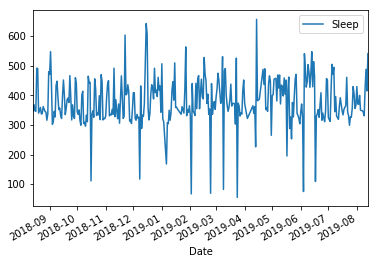

In [34]:
date_sleep[date_sleep.Sleep > 0].plot(x='Date', y='Sleep')

In [35]:
# save to csv
date_sleep.to_csv('data/daily_sleep.csv', index=None, encoding='utf-8')

# Download Daily InBed Log in Minutes

In [36]:
inbed_ts = auth2_client.time_series('sleep/timeInBed', period='1y')

In [37]:
date_inbed_list = [(dateutil.parser.parse(date_sleep_dict['dateTime']), int(date_sleep_dict['value']))
              for date_sleep_dict in inbed_ts['sleep-timeInBed']]
date_inbed = pd.DataFrame(date_inbed_list, columns=('Date', 'InBed'))

In [38]:
date_inbed.tail()

,Date,InBed
360,2019-08-09,375
361,2019-08-10,475
362,2019-08-11,567
363,2019-08-12,472
364,2019-08-13,600


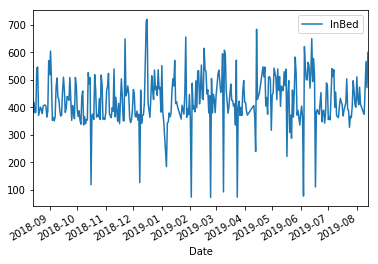

In [39]:
date_inbed[date_inbed.InBed > 0].plot(x='Date', y='InBed')

In [40]:
# save to csv
date_inbed.to_csv('data/daily_inbed.csv', index=None, encoding='utf-8')

----------

# Download Steps Per 15min via Intraday API

In [41]:
# get all Steps stats for a single date
def fitbit_intraday_steps(date):
    fitbit_intra_steps = auth2_client.intraday_time_series('activities/steps', base_date=date, detail_level='15min')
    time_list = []
    val_list = []
    for i in fitbit_intra_steps['activities-steps-intraday']['dataset']:
        val_list.append(i['value'])
        time_list.append(i['time'])
    heartdf = pd.DataFrame({'Steps':val_list,'Time':time_list})
    # add date column
    heartdf['Date'] = date
    # create csv
    heartdf.to_csv('data/steps/steps'+ \
               date+'.csv', \
               columns=['Date', 'Time','Steps'], header=True, \
               index = False)
    print("Generated Steps CSV for %s" % date)

In [42]:
# get multiple date HR data
def fitbit_multidates_steps(datelist):
    for i in datelist[:]:
        fitbit_intraday_steps(i)
        # add a 5 second daily
        # time.sleep(5)

In [43]:
# fitbit_intraday_steps(today)

In [44]:
# fitbit_intraday_steps(yesterday)

In [45]:
# fitbit_multidates_steps(dates_list)

--------

# NEED FIXES: Download Daily Detailed Sleep Log

In [46]:
# sleep_daily = [auth2_client.sleep(date) for date in dates_list]

In [47]:
# check raw log of previous day
# sleep_daily[-2]

In [48]:
# sleep minutes
# sleep_minutes = [sleep_entry['summary']['totalMinutesAsleep'] for sleep_entry in sleep_daily]

# in-bed minutes
# inbed_minutes = [sleep_entry['summary']['totalTimeInBed'] for sleep_entry in sleep_daily]

# sleep_minutes[-3]
# date_sleep = pd.DataFrame({'Date': dates_list, 'Sleep': sleep_minutes, 'InBed': inbed_minutes})

In [49]:
# in bed minutes
# inbed_minutes = [sleep_entry['summary']['totalTimeInBed'] for sleep_entry in sleep_daily]
# inbed_minutes[-3]
# date_inbed = pd.DataFrame({'Date': dates_list, 'InBed': inbed_minutes})

In [50]:
# save to csv
# date_inbed.to_csv('data/daily_inbed.csv', index=None, encoding='utf-8')

In [51]:
# date_sleep[date_sleep.Sleep > 0].plot(x='Date', y="Sleep")
# date_inbed[date_inbed.InBed > 0].plot(x='Date', y="InBed")

----------

# TODO: Download Daily Resting HR and Other HR Zone Data

In [52]:
# hr_ts = auth2_client.time_series('activities/heart', period='30d')

In [53]:
# hr_ts['activities-heart'][-7] # check  from a week ago

In [54]:
# resting hr
# hr_ts['activities-heart'][-7]['value']['restingHeartRate'] # check from a week ago

In [55]:
# Out of Range data
# hr_ts['activities-heart'][-7]['value']['heartRateZones']\
#        ['name' == 'Out of Range'] # check  from a week ago

In [56]:
# Out of Range data = Calories Out
#hr_ts['activities-heart'][-7]['value']['heartRateZones']\
#        ['name' == 'Out of Range']['caloriesOut'] 

In [57]:
# Fat Burn

In [58]:
# Cardio

In [59]:
# Peak

In [60]:
# trying to parse into a list with date and resting heart rate
#date_hr_list = [(dateutil.parser.parse(date_hr_dict['dateTime']), \
#                (date_hr_dict['value')) \
#                for date_hr_dict in hr_ts['activities-heart']]

In [61]:
# type(date_hr_list)

In [62]:
# type(date_hr_list[-1])

# Download A Full Day Record of Heart Rate

In [63]:
# get all HR stats for a single date
def fitbit_HR_stats(date):
    fitbit_intra_HR = auth2_client.intraday_time_series('activities/heart', base_date=date, detail_level='1sec')
    time_list = []
    val_list = []
    for i in fitbit_intra_HR['activities-heart-intraday']['dataset']:
        val_list.append(i['value'])
        time_list.append(i['time'])
    heartdf = pd.DataFrame({'Heart_Rate':val_list,'Time':time_list})
    # add date column
    heartdf['Date'] = date
    # create csv
    heartdf.to_csv('data/hr/heart'+ \
               date+'.csv', \
               columns=['Date', 'Time','Heart_Rate'], header=True, \
               index = False)
    print("Generated CSV for %s" % date)

In [64]:
# get multiple date HR data
def fitbit_multidates_hr(datelist):
    for i in datelist[:]:
        fitbit_HR_stats(i)
        # add a 5 second daily
        # time.sleep(5)

In [65]:
# today's hr data
# fitbit_HR_stats(today)

In [66]:
# yesterday's data
# fitbit_HR_stats(yesterday)

In [67]:
# get data for multiple days
# fitbit_multidates_hr(dates_list)